<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       

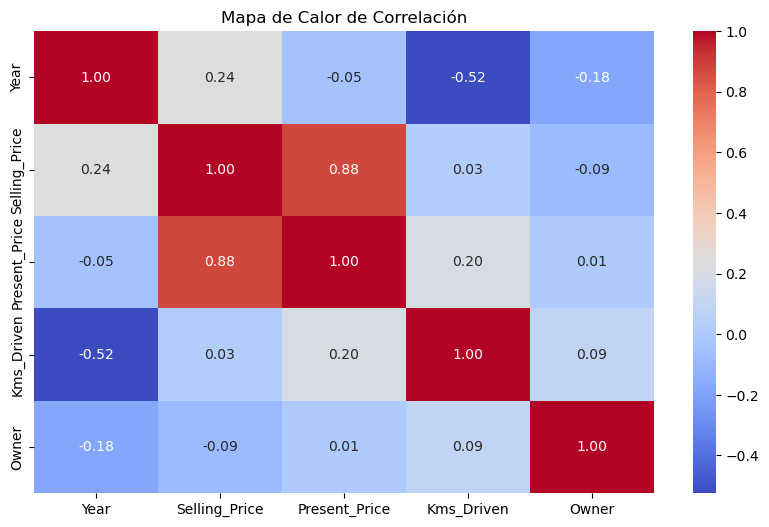

🔹 MAE: 0.7908196721311475
🔹 MSE: 1.8625180327868853
🔹 RMSE: 1.364741013081561
🔹 R2 Score: 0.91914604853433


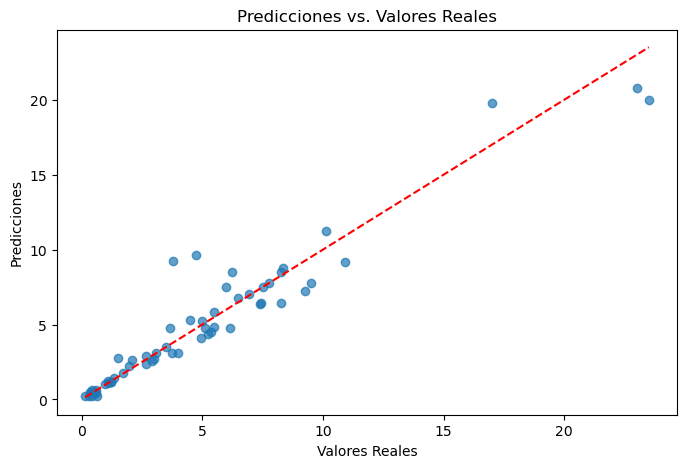

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 📌 **1. Cargar el dataset**
file_path = r"C:\Users\soporte.tecnico3\Desktop\arboles de decision\car data.csv"  # Ruta del archivo
df = pd.read_csv(file_path)

# 📌 **2. Análisis Exploratorio**
print(df.info())  
print(df.describe())  
print(df.head())  

# 📌 **3. Visualización de Correlaciones**
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlación")
plt.show()

# 📌 **4. Selección de Variables Predictoras y Objetivo**
X = df.drop(columns=["Selling_Price"])  # Eliminamos la variable dependiente
y = df["Selling_Price"]

# 📌 **5. División de Datos en Train/Test**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 **6. Preprocesamiento (Normalización)**
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=[np.number]))  
X_test_scaled = scaler.transform(X_test.select_dtypes(include=[np.number]))  

# 📌 **7. Modelo de Árbol de Decisión**
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# 📌 **8. Predicciones**
y_pred = model.predict(X_test_scaled)

# 📌 **9. Evaluación del Modelo**
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"🔹 MAE: {mae}")
print(f"🔹 MSE: {mse}")
print(f"🔹 RMSE: {rmse}")
print(f"🔹 R2 Score: {r2}")

# 📌 **10. Visualización de Resultados**
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs. Valores Reales")
plt.show()
